# Introduction to PyTorch

##What is Pytorch

PyTorch is an open source machine learning library based on the Torch library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab (FAIR)

In simpler language:
You can assume PyTorch to be similar as Numpy but with stronger GPU acceleration.

It is a library for Python programs that facilitates building deep learning projects.
It emphasizes flexibility and allows deep learning models to be expressed in idiomatic Python.

PyTorch provides two high-level features:

*    Tensor computing (like NumPy) with strong acceleration via graphics processing units (GPU)
*    Deep neural networks built on a type-based automatic differentiation system

### But why do we even need Pytorch? 

You might wonder why we need a library like PyTorch at all since Numpy already provides data structures and utilities for working with multi-dimensional numeric data. There are two main reasons:

1. **Autograd**: The ability to automatically compute gradients for tensor operations is essential for training deep learning models.
2. **GPU support**: While working with massive datasets and large models, PyTorch tensor operations can be performed efficiently using a Graphics Processing Unit (GPU). Computations that might typically take hours can be completed within minutes using GPUs.


### Difference between PyTorch and TensorFlow

While some people may already be familiar with TensorFlow, an open source machine learning software library developed by Google. Both TensorFlow and PyTorch have different advantages on each other which I have described in brief below:

TensorFlow is very powerful and mature deep learning library with strong visualization capabilities and several options to use for high-level model development. It has production-ready deployment options and support for mobile platforms. TensorFlow is a good option if you:

*    Develop models for production
*    Develop models which need to be deployed on mobile platforms
*    Want good community support and comprehensive documentation
*    Want rich learning resources in various forms (TensorFlow has an an entire MOOC)
*    Want or need to use Tensorboard
*    Need to use large-scale distributed model training

PyTorch is still a young framework which is getting momentum fast. You may find it a good fit if you:

*    Do research or your production non-functional requirements are not very demanding
*    Want better development and debugging experience
*    Love all things Pythonic

If you have the time the best advice would be to try both and see what fits your needs best.

You can find a more in-depth guide on the differences [here](https://builtin.com/data-science/pytorch-vs-tensorflow).

### How to run the code

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing the code is to run it on Google Colab by simply downloading this file and uploading it on Google Colab.


#### Option 2: Running on your computer locally

To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. We recommend using the [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) distribution of Python. 

>  **Jupyter Notebooks**: This tutorial is a [Jupyter notebook](https://jupyter.org) - a document made of _cells_. Each cell can contain code written in Python or explanations in plain English. You can execute code cells and view the results instantly within the notebook. It is widely used for Analysis.

Before we begin, we need to install the required libraries. The installation of PyTorch may differ based on your operating system / cloud environment. You can find detailed installation instructions here: https://pytorch.org .


In [15]:
#pip is a package-management system written in Python used to install and manage software packages
#installation with pip:

# pip3 install torch torchvision

Let's import the torch module to get started

In [16]:
import torch

Let us also switch to the GPU to the observe the full power of PyTorch.
We can switch to the GPU in Colab Notebook by:

`Runtime>Change Runtime Type>Hardware Selector>GPU`

## Tensors

PyTorch tensors are similar to Numpy ndarrays with the option to operate on GPU.

At its core, PyTorch is a library for processing tensors. 

A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.

Torch defines 10 tensor types with CPU and GPU variants which can be found on it's offcial [documentation page](https://pytorch.org/docs/stable/tensors.html)

In [17]:
# Number
t1 = torch.tensor(4.)
t1

tensor(4.)

In [18]:
# Vector
t2 = torch.tensor([1., 2, 3, 4])
t2

tensor([1., 2., 3., 4.])

In [19]:
# Matrix
t3 = torch.tensor([[5., 6], 
                   [7, 8], 
                   [9, 10]])
t3

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [20]:
# 3-dimensional array
t4 = torch.tensor([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]])
t4

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])

The contents of a tensor can be accessed and modified using Python’s indexing and slicing notation:

In [21]:
t5 = torch.tensor([[1,2,3],
                   [4,5,6]])
t5[0,1]

tensor(2)

In [22]:
t5[1,2]=0
t5

tensor([[1, 2, 3],
        [4, 5, 0]])

Tensors can have any number of dimensions and different lengths along each dimension. We can inspect the length along each dimension using the `.shape` property of a tensor.

In [23]:
print(t1)
t1.shape

tensor(4.)


torch.Size([])

In [24]:
print(t2)
t2.shape

tensor([1., 2., 3., 4.])


torch.Size([4])

In [25]:
print(t3)
t3.shape

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])


torch.Size([3, 2])

In [26]:
print(t4)
t4.shape

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])


torch.Size([2, 2, 3])

In [27]:
print(t5)
t5.shape

tensor([[1, 2, 3],
        [4, 5, 0]])


torch.Size([2, 3])

Note that it's not possible to create tensors with an improper shape.

In [28]:
# Matrix
t6 = torch.tensor([[5., 6, 11], 
                   [7, 8], 
                   [9, 10]])
t6

ValueError: ignored

### Tensor operations and gradients

We can combine tensors with the usual arithmetic operations. Let's look at an example:

In [30]:
x = torch.tensor(2.)
y = torch.tensor(5., requires_grad=True)
z = torch.tensor(7., requires_grad=True)

We have creates 3 tensors `x`,`y` and `z` with 2 of them having `requies_grad` set to `True`

In [31]:
#Arithmetic Operation
f = x * y + z
f

tensor(17., grad_fn=<AddBackward0>)

What makes PyTorch unique is that we can automatically compute the derivative of `f` w.r.t. the tensors that have `requires_grad` set to `True` i.e. w and b. This feature of PyTorch is called [_autograd_](https://pytorch.org/docs/stable/autograd.html#module-torch.autograd) (automatic gradients).

To compute the derivatives, we can invoke the `.backward` method on our result `y`.

`grad` is short for Gradient, which is another name for Derivatives.


In [32]:
# Compute derivatives
f.backward()

The derivatives of `f` with respect to the input tensors are stored in the `.grad` property of the respective tensors.

In [33]:
# Display gradients
print('df/dx:', x.grad)
print('df/dy:', y.grad)
print('df/dz:', z.grad)

df/dx: None
df/dy: tensor(2.)
df/dz: tensor(1.)


### Tensor functions

Apart from arithmetic operations, the `torch` module also contains many functions for creating and manipulating tensors. Let's look at some examples:

In [34]:
# Create a tensor with a fixed value for every element
t7 = torch.full((3, 2), 31)
t7

tensor([[31, 31],
        [31, 31],
        [31, 31]])

In [35]:
# Concatenate two tensors with compatible shapes
t8 = torch.cat((t3, t7))
t8

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.],
        [31., 31.],
        [31., 31.],
        [31., 31.]])

In [36]:
# Compute the cos of each element
t9 = torch.cos(t8)
t9

tensor([[ 0.2837,  0.9602],
        [ 0.7539, -0.1455],
        [-0.9111, -0.8391],
        [ 0.9147,  0.9147],
        [ 0.9147,  0.9147],
        [ 0.9147,  0.9147]])

In [37]:
# Change the shape of a tensor
t10 = t9.reshape(3, 2, 2)
t10

tensor([[[ 0.2837,  0.9602],
         [ 0.7539, -0.1455]],

        [[-0.9111, -0.8391],
         [ 0.9147,  0.9147]],

        [[ 0.9147,  0.9147],
         [ 0.9147,  0.9147]]])

Let's look at difference between 2 very similar functions:

In [38]:
#Difference between 2 PyTorch Functions:  view & permute

x = torch.rand(2,4) #generates a random tensor of 2x4

print('x:', x)

print('shape:', x.shape)



y = x.view(4, 2) #view the tensor as 4x2

print('y:', y)

print('shape:', y.shape)



z = x.permute(1, 0) #works like transpose of a matrix

print('z:', z)

print('shape:', z.shape)

x: tensor([[0.1328, 0.0060, 0.6044, 0.5042],
        [0.8940, 0.9768, 0.4488, 0.4697]])
shape: torch.Size([2, 4])
y: tensor([[0.1328, 0.0060],
        [0.6044, 0.5042],
        [0.8940, 0.9768],
        [0.4488, 0.4697]])
shape: torch.Size([4, 2])
z: tensor([[0.1328, 0.8940],
        [0.0060, 0.9768],
        [0.6044, 0.4488],
        [0.5042, 0.4697]])
shape: torch.Size([4, 2])


You can find more useful functions in the official documentation [here](https://pytorch.org/docs/stable/torch.html)

## Tensors in CPU and GPU

GPU composes of hundreds of simpler cores, which makes training deep learning models much faster. Refer to the Image below:

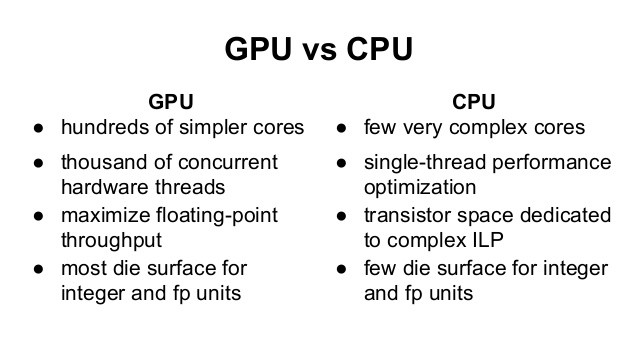

Whether we decide to use GPU or CPU, PyTorch makes it easy for us to switch between the two

In [39]:
cpu=torch.device("cpu")
gpu=torch.device("cuda:0") # GPU 0# Create tensor with CPU
x=torch.ones(3,3, device=cpu)
print("CPU:",x.device)

x=torch.ones(3,3, device=gpu)
print("GPU:",x.device)

x=torch.ones(3,3).cuda(0)
print("CPU to GPU:",x.device)

x=torch.ones(3,3, device=gpu).cpu()
print("GPU to CPU:",x.device)

CPU: cpu
GPU: cuda:0
CPU to GPU: cuda:0
GPU to CPU: cpu


Please note: If you face an error in the above program, it might be because you haven't changed to the GPU or your system doesn't have one.
On Google Colab you can find a way to change to GPU:

`Runtime>Change Runtime Type>Hardware Selector>GPU`

### Compare time between GPU and CPU

### Time in CPU

In [40]:
import time
x=torch.rand(10000,10000)
y=torch.rand(10000,10000)
t = time.time()
z=x@y
t = time.time()-t
print(t)

26.8402316570282


#### Time in GPU

In [41]:
xc=x.cuda(0)
yc=y.cuda(0)
t = time.time()
z=xc@yc
t = time.time()-t
print(t)

0.018400192260742188


We can see that there is `considerably big difference` in time taken.  

## Interoperability with Numpy

[Numpy](http://www.numpy.org/) is a popular open-source library used for mathematical and scientific computing in Python. It enables efficient operations on large multi-dimensional arrays and has a vast ecosystem of supporting libraries, including:

* [Pandas](https://pandas.pydata.org/) for file I/O and data analysis
* [Matplotlib](https://matplotlib.org/) for plotting and visualization
* [OpenCV](https://opencv.org/) for image and video processing

Instead of reinventing the wheel, PyTorch interoperates well with Numpy to leverage its existing ecosystem of tools and libraries.

In [44]:
import numpy as np #we need to import the numpy library

x = np.array([[1, 2], [3, 4.]])
x

array([[1., 2.],
       [3., 4.]])

We can convert a Numpy array to a PyTorch tensor using `torch.from_numpy`.

In [45]:
# Convert the numpy array to a torch tensor.
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

Numpy array and Torch tensor will have similar datatype:

In [46]:
x.dtype, y.dtype

(dtype('float64'), torch.float64)

We can convert a PyTorch tensor to a Numpy array using the `.numpy` method of a tensor.

In [47]:
# Convert a torch tensor to a numpy array
z = y.numpy()
z

array([[1., 2.],
       [3., 4.]])

The interoperability between PyTorch and Numpy is essential because most datasets you'll work with will likely be read and preprocessed as Numpy arrays.


## What next?
You can further your introduction to this library by looking up more about it on the official documentation page [here](https://pytorch.org/docs/stable/index.html). 

You can look for datasets on [kaggle](https://www.kaggle.com/) and implement some of the premade models in the library.

## Resources referred:

* https://towardsdatascience.com/what-is-pytorch-a84e4559f0e3
* https://towardsdatascience.com/pytorch-vs-tensorflow-spotting-the-difference-25c75777377b
* https://en.wikipedia.org/wiki/PyTorch
* https://en.wikipedia.org/wiki/TensorFlow
* https://pytorch.org/docs/stable/index.html
* https://builtin.com/data-science/pytorch-vs-tensorflow
* https://www.youtube.com/watch?v=zEtukWs_B2I&list=PLyMom0n-MBroupZiLfVSZqK5asX8KfoHL